In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


In [ ]:
np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
K = 3


In [ ]:
np.random.seed(163)

# Initialize random centroids


def init_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

# Assign labels for all points


def assign_label(X, centroids):
    D = cdist(X, centroids)
    return np.argmin(D, axis=1)

# Stop condition


def has_converged(centroids, new_centroids):
    return (set([tuple(a) for a in centroids]) ==
            set([tuple(a) for a in new_centroids]))

# Update centroids


def update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i, :] = np.mean(X[labels == i, :], axis=0)
    return centroids


def k_means(X, K):
    count = 0
    centroids = init_centroids(X, K)
    labels = assign_label(X, centroids)
    colors = ['royalblue', 'orange', 'limegreen']
    while True:
        # Visualize training process
        plt.figure(count)
        for i in range(K):
            plt.scatter(X[labels == i, 0], X[labels == i, 1],
                        marker='.', color=colors[i])
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='o', linewidths=5, color='red')
        plt.xticks([])
        plt.yticks([])
        # Update centroids
        if has_converged(centroids, update_centroids(X, labels, K)):
            break
        else:
            centroids = update_centroids(X, labels, K)
            labels = assign_label(X, centroids)
        count += 1
    return centroids


X = np.concatenate((X0, X1, X2), axis=0)
print(k_means(X, K))
plt.figure(8)
plt.title('True data')
plt.scatter(X0[:, 0], X0[:, 1], marker='.', color='orange')
plt.scatter(X1[:, 0], X1[:, 1], marker='.', color='limegreen')
plt.scatter(X2[:, 0], X2[:, 1], marker='.', color='royalblue')
plt.xticks([])
plt.yticks([])


In [ ]:
# Implement K-means clustering on the data set and print out the results.
from __future__ import print_function
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
data = load_iris()
model = KMeans(n_clusters=3, random_state=231, n_init=3)
model.fit(data.data)
# print(model.labels_)
# Calculate accuracy score.

print(accuracy_score(model.labels_, data.target))
print(model.labels_)
print(data.target)
print(model.cluster_centers_)
# print(model.cluster_centers_)

# Visualize the clustering results.

pca = PCA(n_components=2)

pca.fit(data.data)


pca_2d = pca.transform(data.data)

In [ ]:
plt.figure(1)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=model.labels_)
# plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
#                     marker='o', linewidths=5, color='red')
plt.figure(2)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=data.target)
plt.show()

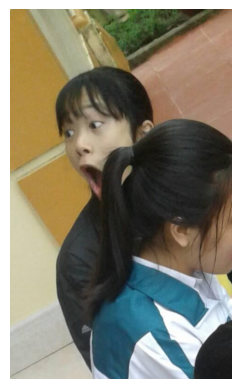

(384000, 3)


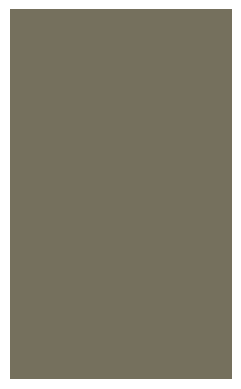

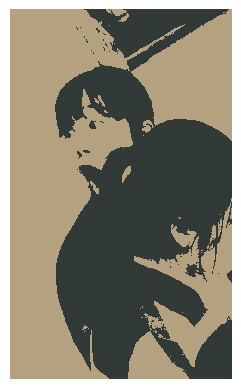

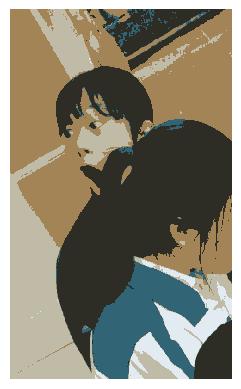

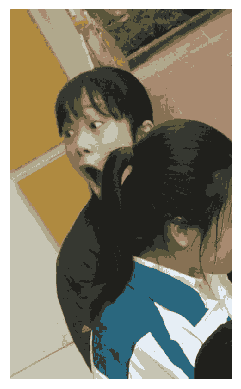

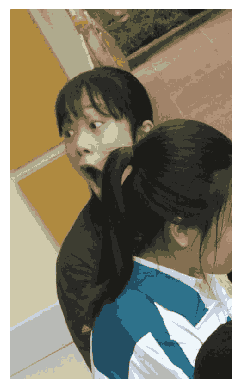

In [45]:
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
img = mpimg.imread('C:/Users/nguye/Downloads/Friends/duongdeeptry.jpg')

plt.imshow(img)
plt.axis('off')
plt.show()
# print(img)
X = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
print(X.shape)

for k in [1,2,5,10,15]:
    models = KMeans(n_clusters=k,n_init=3,random_state=412,init='k-means++').fit(X)

    img2 = np.zeros_like(X)

    for i in range(k):
        img2[models.labels_==i] = models.cluster_centers_[i]
        
    img2 = img2.reshape(img.shape)
    plt.imshow(img2,interpolation='nearest')
    plt.axis('off')
    plt.show()
    # Save image to Downloads
    
    plt.imsave('C:/Users/nguye/Downloads/'+str(k)+'.jpg', img2)

